# Copy The Brain Scan Image Dataset of Alzheimer Patient

In [1]:
!git clone "https://github.com/srajan-kiyotaka/Alzheimer-Disease-Prediction"

fatal: destination path 'Alzheimer-Disease-Prediction' already exists and is not an empty directory.


# Store The Images in The List

In [2]:
# import opencv
import cv2

# store list
images = []
lables = []

## AD Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 172):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final AD JPEG/AD ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(0)  # AD

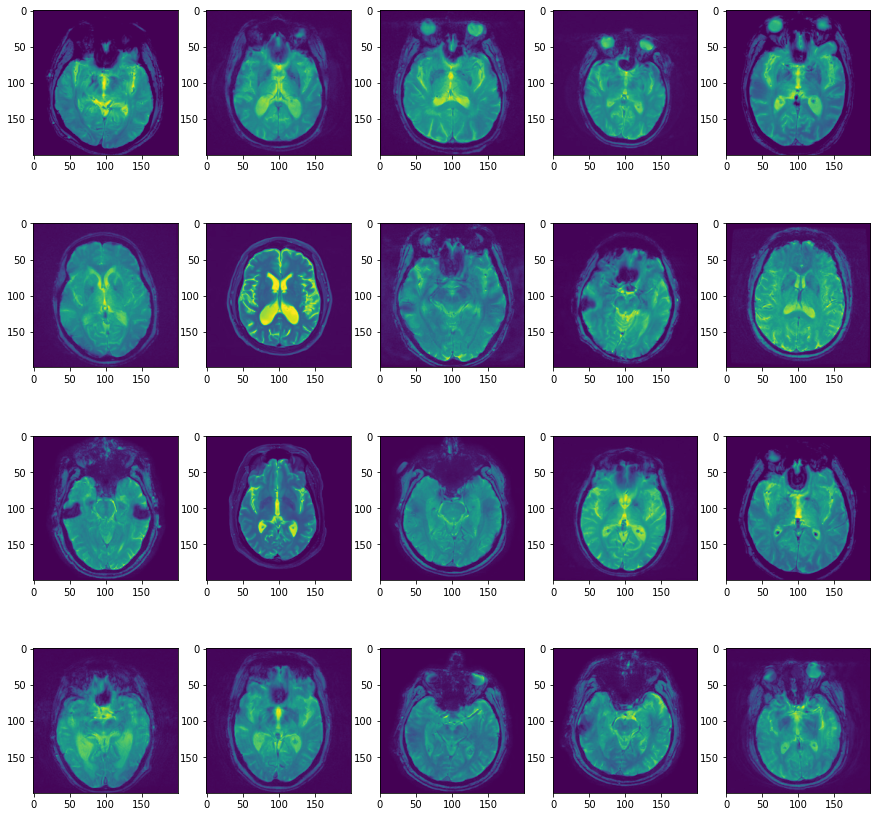

In [3]:
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[10 + i*3])
plt.show()

In [4]:
## CN Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 581):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final CN JPEG/CN ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(1)  # CN

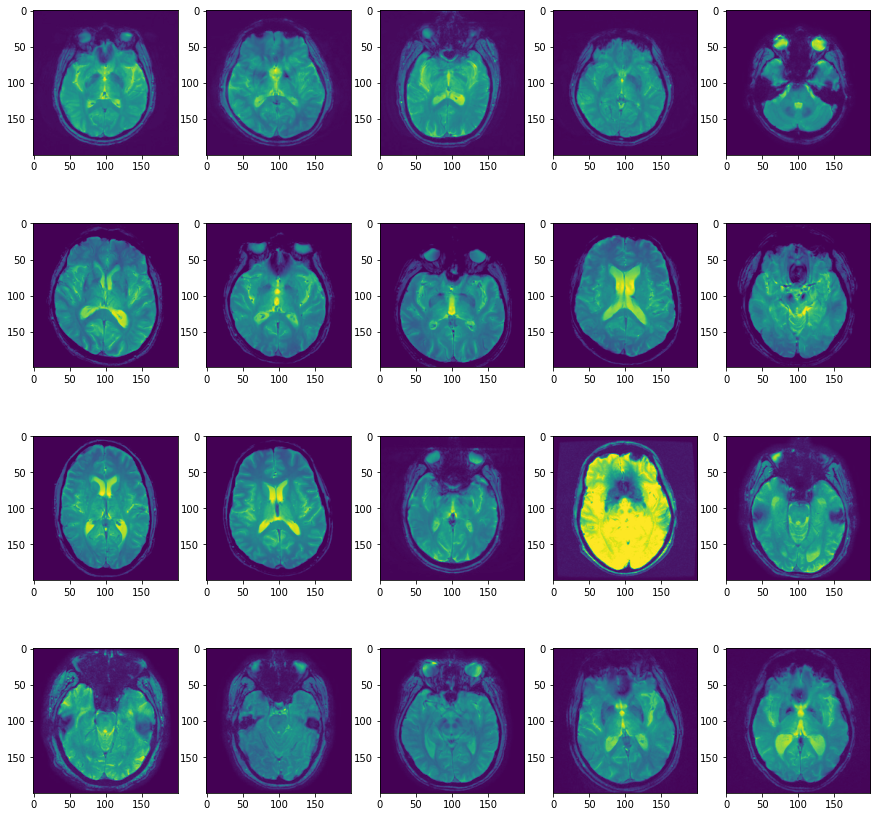

In [5]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[200 + i*3])
plt.show()

In [6]:
## EMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 241):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final EMCI JPEG/EMCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(2)  # EMCI

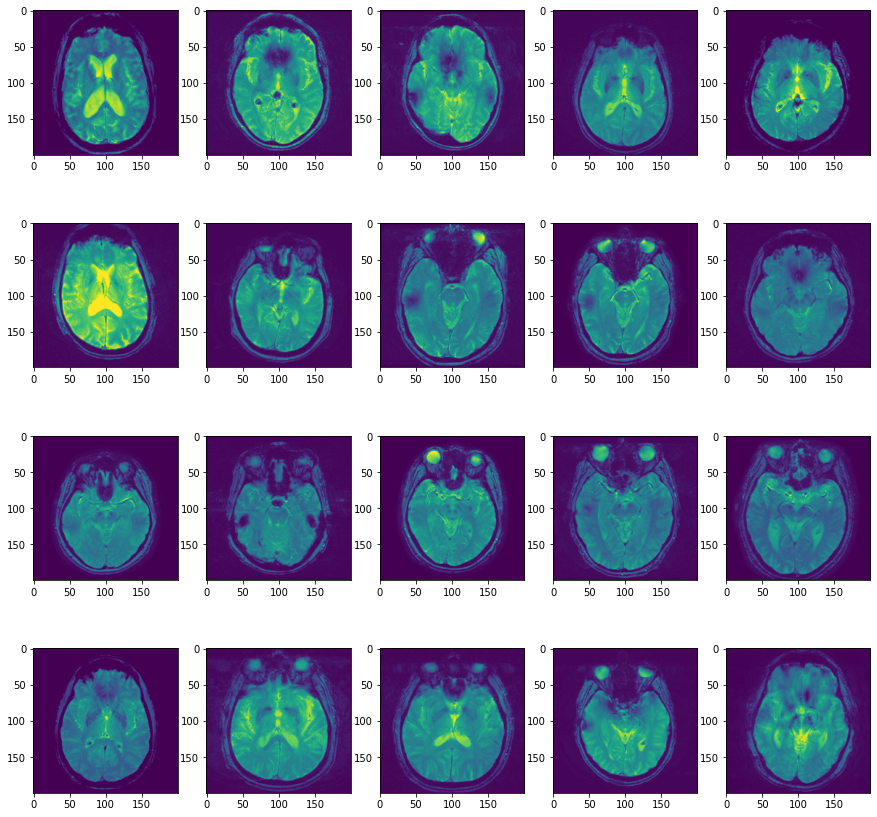

In [7]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[780 + i*3])
plt.show()

In [8]:
## LMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 73):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final LMCI JPEG/LMCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(3)  # LMCI

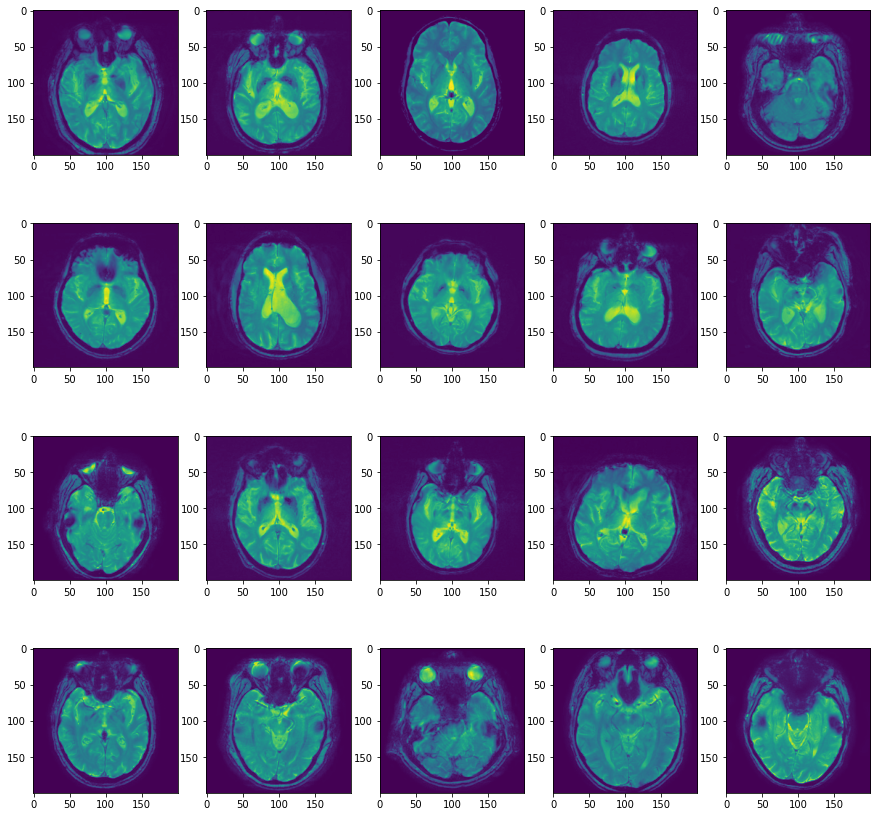

In [9]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[995 + i*3])
plt.show()

In [10]:
## LMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 234):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final MCI JPEG/MCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(200, 200))
    images.append(gray)
    lables.append(4)  # MCI

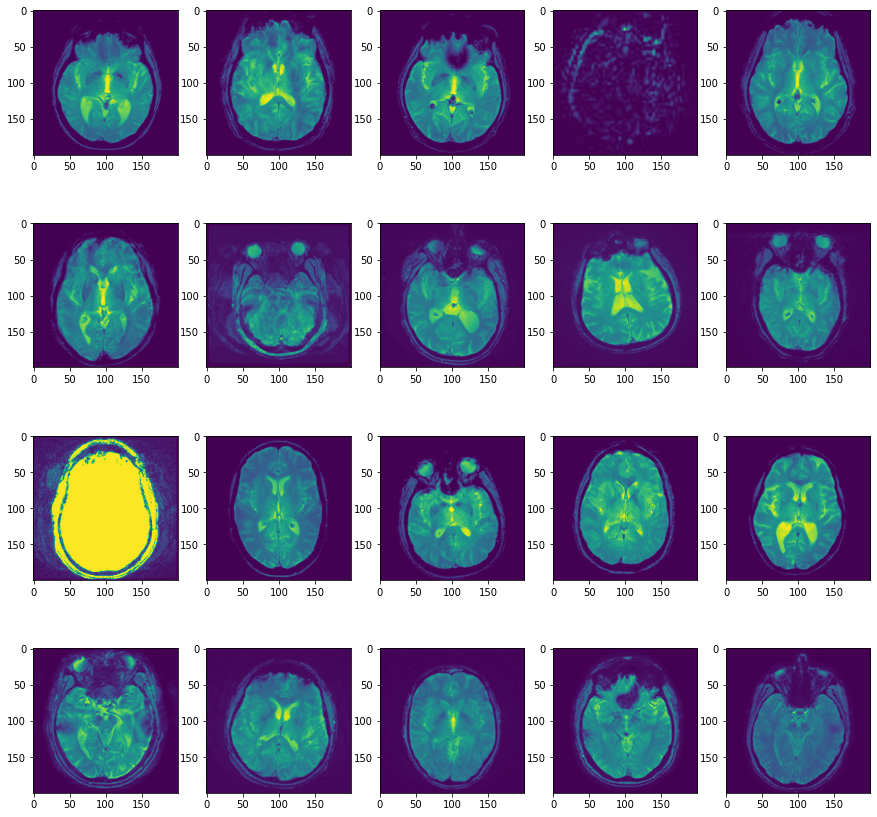

In [11]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[1080 + i*3])
plt.show()

In [12]:
# Shape of the Images

print(f"Shape of each image is = {images[1000].shape}")

Shape of each image is = (200, 200)


In [13]:
# Convert The List into Array Format  #

import numpy as np

train_feature = np.array(images)
lables = np.array(lables)

In [14]:
## Display Array Shape ##

print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (1296, 200, 200)
lable dataset shape = (1296,)


# Split The Dataset into Test and Train

In [15]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(train_feature,lables,test_size=0.12)

print(f"train_features shape = {train_features.shape}")

print(f"test_features shape = {test_features.shape}")

print(f"train_target shape = {train_target.shape}")

print(f"test_target shape = {test_target.shape}")

train_features shape = (1140, 200, 200)
test_features shape = (156, 200, 200)
train_target shape = (1140,)
test_target shape = (156,)


# Deep Learning CNN Model Architecture

In [16]:
# MODEL ARCHITECTURE

import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE NOT ENCODING

train_target = to_categorical(lables)

# MODEL LAYERS

model=Sequential()
# Convolutional Layers
model.add(Conv2D(25, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200, 200, 1)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 25)      250       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 75)      16950     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 75)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 750000)            0         
                                                                 
 dense (Dense)               (None, 500)               375000500 
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                        

In [17]:
# MODEL COPILE

from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# MODEL FITTING

model.fit(train_feature, train_target, batch_size = 120, epochs = 20)

Epoch 1/20
11/11 [==============================] - 21s 1s/step - loss: 4.2088 - accuracy: 0.3380
Epoch 2/20
11/11 [==============================] - 11s 1s/step - loss: 1.4873 - accuracy: 0.4306
Epoch 3/20
11/11 [==============================] - 11s 999ms/step - loss: 1.4468 - accuracy: 0.4475
Epoch 4/20
11/11 [==============================] - 11s 992ms/step - loss: 1.4213 - accuracy: 0.4475
Epoch 5/20
11/11 [==============================] - 11s 997ms/step - loss: 1.4139 - accuracy: 0.4475
Epoch 6/20
11/11 [==============================] - 11s 996ms/step - loss: 1.4036 - accuracy: 0.4475
Epoch 7/20
11/11 [==============================] - 11s 1s/step - loss: 1.3808 - accuracy: 0.4483
Epoch 8/20
11/11 [==============================] - 11s 1s/step - loss: 1.3517 - accuracy: 0.4514
Epoch 9/20
11/11 [==============================] - 11s 1s/step - loss: 1.2867 - accuracy: 0.4715
Epoch 10/20
11/11 [==============================] - 11s 1s/step - loss: 1.1341 - accuracy: 0.5494
Epoch 1

In [19]:
# Test our Model

predictions = model.predict(test_features)

In [20]:
# Accuracy of Our Model #

wrong = 0

for i in range(156) :
    test = np.argmax(predictions[i])
    train = test_target[i]
    if (test != train):
        wrong += 1

print(f"Model Accuracy : {((156 - wrong)/156)*100} %")

Model Accuracy : 99.35897435897436 %
